In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['year','month','year'], axis=1, inplace=True)

In [6]:
df.head()

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding
df['Classes']= np.where(df['Classes'].str.contains("not fire"),0, 1)

In [9]:
df.tail()

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,30,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [11]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
X.head()

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
236    6.5
237    0.0
238    0.2
239    0.7
240    0.5
Name: FWI, Length: 241, dtype: float64

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((180, 12), (61, 12))

In [16]:
## Correlation
X_train.corr()

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
day,1.000000,0.059440,-0.062547,0.001538,-0.037954,0.199019,0.490298,0.513487,0.167907,0.514425,0.180853,0.017683
Temperature,0.059440,1.000000,-0.658884,-0.283527,-0.329838,0.695701,0.490708,0.368994,0.609129,0.461458,0.529054,0.254575
RH,-0.062547,-0.658884,1.000000,0.255366,0.218938,-0.636912,-0.383872,-0.201891,-0.687823,-0.330053,-0.429008,-0.388707
Ws,0.001538,-0.283527,0.255366,1.000000,0.315301,-0.191422,-0.012974,0.078715,0.009717,0.020902,-0.088843,-0.199183
Rain,-0.037954,-0.329838,0.218938,0.315301,1.000000,-0.532895,-0.266456,-0.284452,-0.324347,-0.277710,-0.343453,-0.104973
FFMC,0.199019,0.695701,-0.636912,-0.191422,-0.532895,1.000000,0.598514,0.504184,0.733343,0.584447,0.763900,0.266560
DMC,0.490298,0.490708,-0.383872,-0.012974,-0.266456,0.598514,1.000000,0.878344,0.665321,0.984121,0.589805,0.207122
DC,0.513487,0.368994,-0.201891,0.078715,-0.284452,0.504184,0.878344,1.000000,0.508745,0.947259,0.502396,-0.084035
ISI,0.167907,0.609129,-0.687823,0.009717,-0.324347,0.733343,0.665321,0.508745,1.000000,0.628279,0.727029,0.282773
BUI,0.514425,0.461458,-0.330053,0.020902,-0.277710,0.584447,0.984121,0.947259,0.628279,1.000000,0.578800,0.104204


<Axes: >

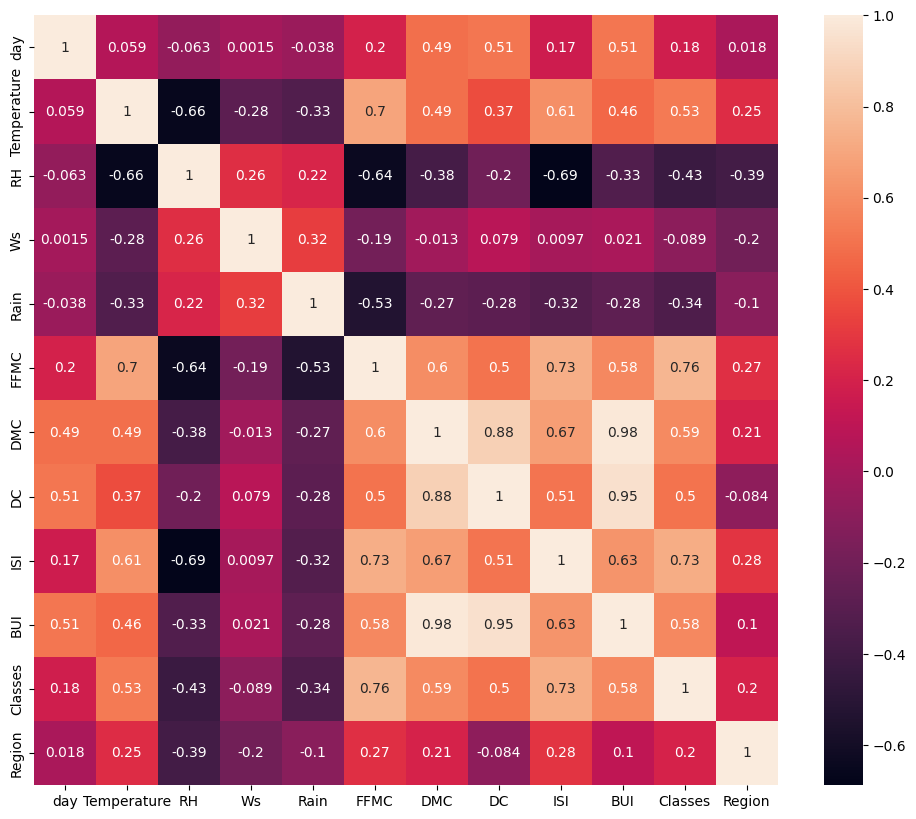

In [17]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [21]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((180, 10), (61, 10))

## Feature Scaling Or Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-1.10854136, -0.82582663,  0.76875417, ..., -0.62417554,
        -1.11803399, -0.97801929],
       [ 0.59885263, -0.03373714, -0.48680422, ...,  0.06950049,
         0.89442719,  1.02247472],
       [-0.53941003,  2.07850149, -2.07277271, ...,  2.84420462,
         0.89442719,  1.02247472],
       ...,
       [-1.67767269, -1.88194595,  0.90091821, ..., -1.07865294,
        -1.11803399, -0.97801929],
       [ 1.73711529,  1.286412  , -0.48680422, ...,  0.85885598,
         0.89442719,  1.02247472],
       [-0.53941003, -0.5617968 ,  0.96700023, ..., -0.86337417,
        -1.11803399, -0.97801929]], shape=(180, 10))

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

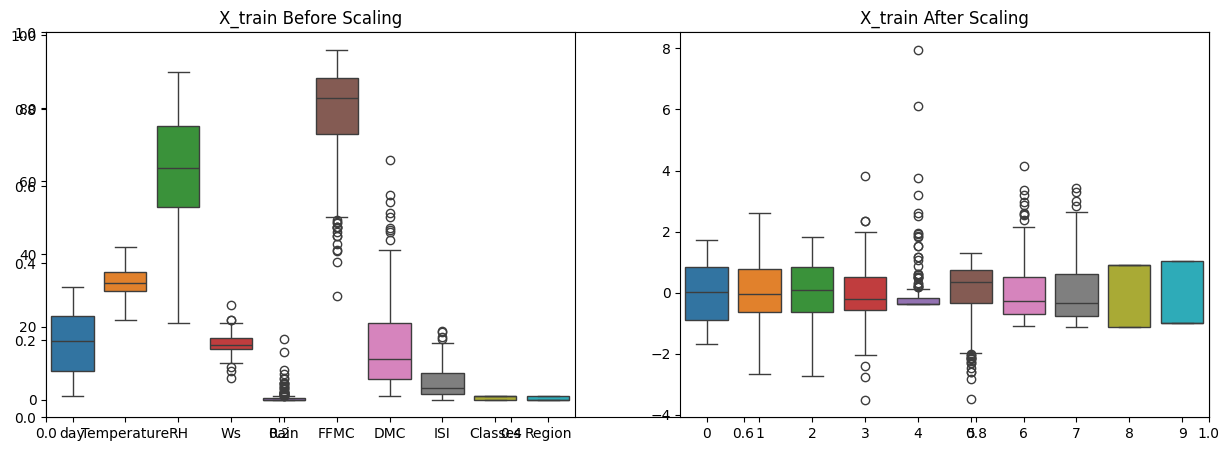

In [24]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

MAE =  0.6750817713201662
R2 Square =  0.9835819292755918


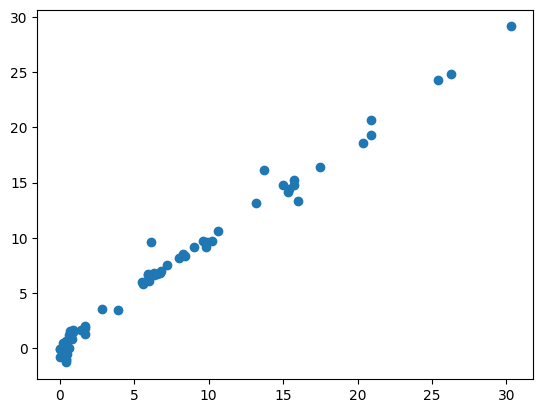

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MAE = ", mae)
print("R2 Square = ",score)

plt.scatter(y_test, y_pred)

# Lasso Regression

MAE =  1.2522657911410187
R2 Square =  0.9473075069701654


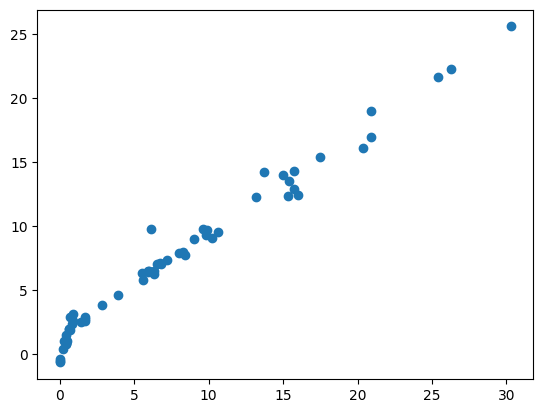

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MAE = ", mae)
print("R2 Square = ",score)

plt.scatter(y_test, y_pred)

In [34]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [35]:
lassocv.alpha_

np.float64(0.05882457722056596)

In [37]:
lassocv.alphas_

array([6.76339692, 6.3075666 , 5.88245772, 5.48599976, 5.11626174,
       4.77144282, 4.44986354, 4.14995763, 3.87026438, 3.60942151,
       3.36615858, 3.13929076, 2.92771307, 2.73039501, 2.54637552,
       2.37475833, 2.21470757, 2.06544369, 1.9262397 , 1.79641759,
       1.67534506, 1.56243241, 1.45712969, 1.35892403, 1.2673371 ,
       1.18192282, 1.10226518, 1.02797619, 0.95869404, 0.89408127,
       0.83382318, 0.77762629, 0.72521688, 0.67633969, 0.63075666,
       0.58824577, 0.54859998, 0.51162617, 0.47714428, 0.44498635,
       0.41499576, 0.38702644, 0.36094215, 0.33661586, 0.31392908,
       0.29277131, 0.2730395 , 0.25463755, 0.23747583, 0.22147076,
       0.20654437, 0.19262397, 0.17964176, 0.16753451, 0.15624324,
       0.14571297, 0.1358924 , 0.12673371, 0.11819228, 0.11022652,
       0.10279762, 0.0958694 , 0.08940813, 0.08338232, 0.07776263,
       0.07252169, 0.06763397, 0.06307567, 0.05882458, 0.05486   ,
       0.05116262, 0.04771443, 0.04449864, 0.04149958, 0.03870

In [38]:
lassocv.mse_path_

array([[45.97999642, 40.13095114, 36.98993305, 81.69701823, 65.62124421],
       [40.95299205, 35.59811105, 31.70057291, 81.69701823, 62.66839123],
       [35.99582012, 31.55864898, 27.19334305, 75.40519   , 56.13632957],
       [31.66759028, 28.01909758, 23.36010162, 68.5789962 , 50.43861118],
       [27.88746209, 24.91622358, 20.10717175, 62.55546623, 45.46767167],
       [24.58509981, 22.1947383 , 17.35355251, 57.2358791 , 39.93534955],
       [21.699139  , 19.80649966, 15.0290935 , 52.53397961, 34.93788837],
       [19.1764982 , 17.70947235, 13.0731448 , 48.18143521, 30.589185  ],
       [16.97059179, 15.86718389, 11.43319977, 42.36133476, 26.8049408 ],
       [15.04096287, 14.24763524, 10.06410811, 37.28523484, 23.51133962],
       [13.35237037, 12.82297489,  8.9266724 , 32.85701281, 20.64545274],
       [11.8741132 , 11.56890078,  7.98712488, 28.99317747, 18.1512579 ],
       [10.57931661, 10.46420331,  7.21633837, 25.62105218, 15.98044886],
       [ 9.44493951,  9.49036739,  6.5

Mean absolute error 0.724381248695435
R2 Score 0.9823002250718518


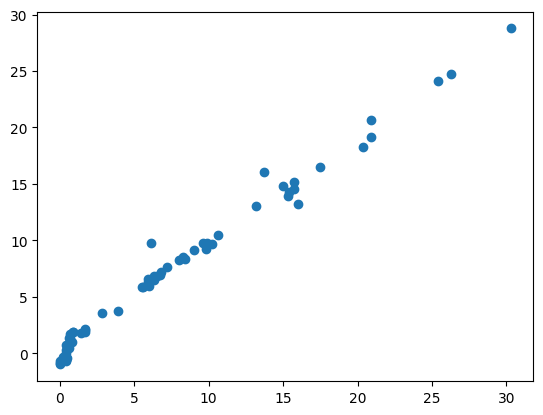

In [39]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

# Ridge Regression

MAE =  0.7051961101879612
R2 Square =  0.9828335114611859


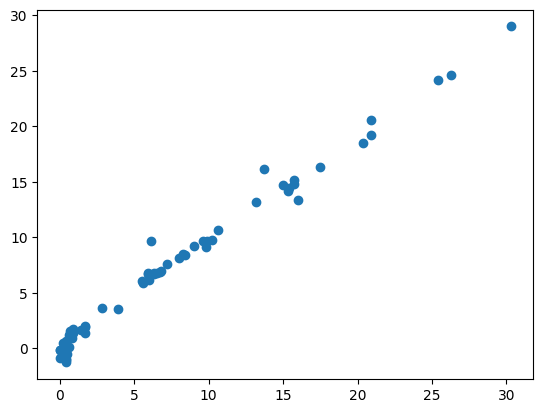

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MAE = ", mae)
print("R2 Square = ",score)

plt.scatter(y_test, y_pred)

Mean absolute error 0.9301198225387527
R2 Score 0.9744763057823123


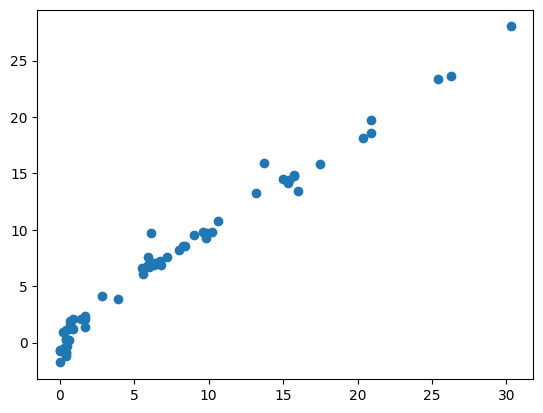

In [40]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [41]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# ElasticNet Regression

MAE =  1.911780250233326
R2 Square =  0.8822664986283127


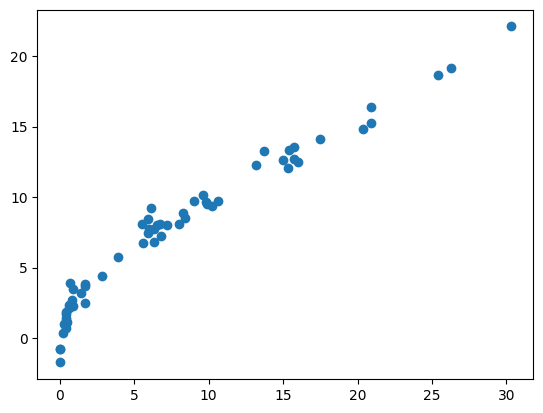

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MAE = ", mae)
print("R2 Square = ",score)

plt.scatter(y_test, y_pred)

Mean absolute error 0.7743170887036899
R2 Score 0.98093804239781


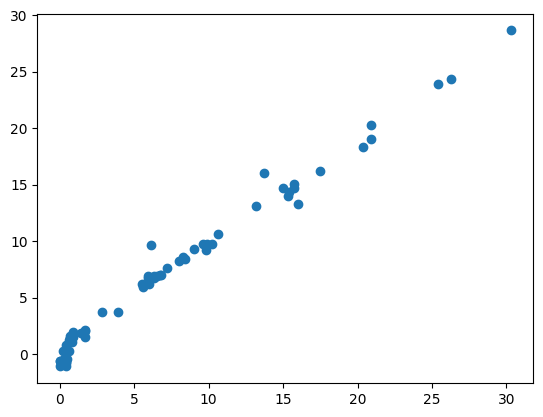

In [44]:
from sklearn.linear_model import ElasticNetCV
elastic_cv=ElasticNetCV(cv=5)
elastic_cv.fit(X_train_scaled,y_train)
y_pred=elastic_cv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [45]:
elastic_cv.alphas_

array([13.52679383, 12.6151332 , 11.76491544, 10.97199952, 10.23252347,
        9.54288564,  8.89972709,  8.29991527,  7.74052876,  7.21884302,
        6.73231717,  6.27858152,  5.85542614,  5.46079002,  5.09275104,
        4.74951667,  4.42941514,  4.13088739,  3.8524794 ,  3.59283518,
        3.35069012,  3.12486482,  2.91425939,  2.71784806,  2.5346742 ,
        2.36384564,  2.20453035,  2.05595239,  1.91738808,  1.78816254,
        1.66764637,  1.55525258,  1.45043376,  1.35267938,  1.26151332,
        1.17649154,  1.09719995,  1.02325235,  0.95428856,  0.88997271,
        0.82999153,  0.77405288,  0.7218843 ,  0.67323172,  0.62785815,
        0.58554261,  0.546079  ,  0.5092751 ,  0.47495167,  0.44294151,
        0.41308874,  0.38524794,  0.35928352,  0.33506901,  0.31248648,
        0.29142594,  0.27178481,  0.25346742,  0.23638456,  0.22045304,
        0.20559524,  0.19173881,  0.17881625,  0.16676464,  0.15552526,
        0.14504338,  0.13526794,  0.12615133,  0.11764915,  0.10